In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
from sklearn.utils import shuffle
from sklearn.model_selection import LearningCurveDisplay, learning_curve
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [4]:
#Data counts
X, y = datasets.load_iris(return_X_y=True)
iris_count = X.shape[0]
print(iris_count)

X, y = datasets.load_breast_cancer(return_X_y=True)
bc_count = X.shape[0]
print(bc_count)

150
569


iris default tree is depth  6
CV train [1. 1. 1. 1. 1.]


[Text(0.3076923076923077, 0.9285714285714286, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [35, 41, 36]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.498\nsamples = 77\nvalue = [0, 41, 36]'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.38461538461538464, 0.5, 'petal length (cm) <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.46153846153846156, 0.35714285714285715

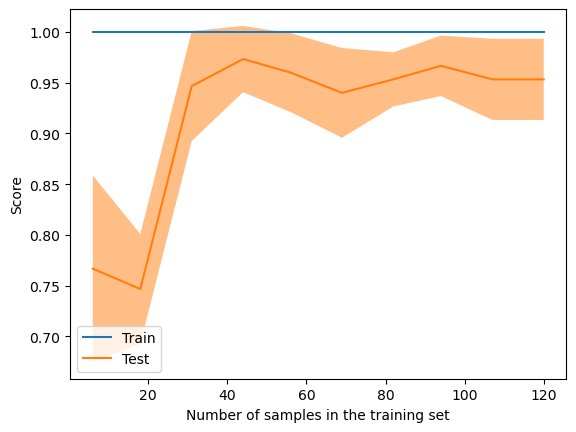

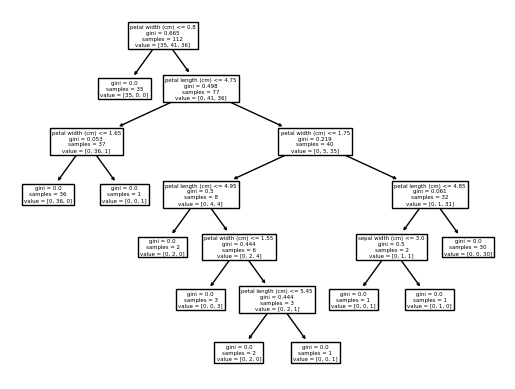

In [16]:
# Iris init

# shuffled dataset
iris = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
iris_init_depth = clf.get_depth()
scores = cross_val_score(clf, X, y)
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']

print("iris default tree is depth ", iris_init_depth)
print("CV train", train_scores)

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X,y, train_sizes=np.linspace(0.05, 1.0, 10))

# Validation Curves
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "max_depth", 
                                      param_range = [x for x in range(1,10, 1)])

ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "ccp_alpha", 
                                      param_range = [x/1000 for x in range(0,30, 1)])


tree.plot_tree(clf, feature_names = iris.feature_names)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3409740180318702


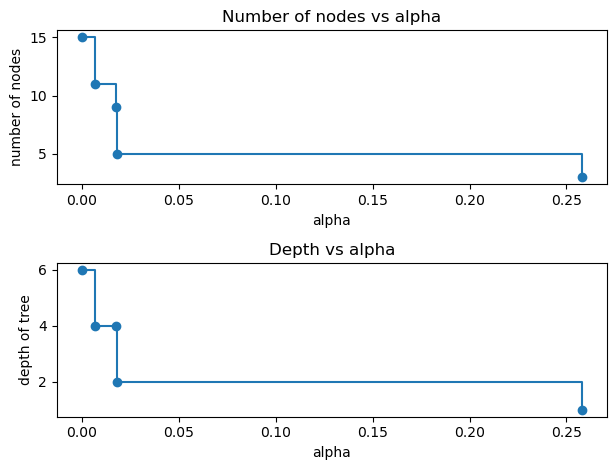

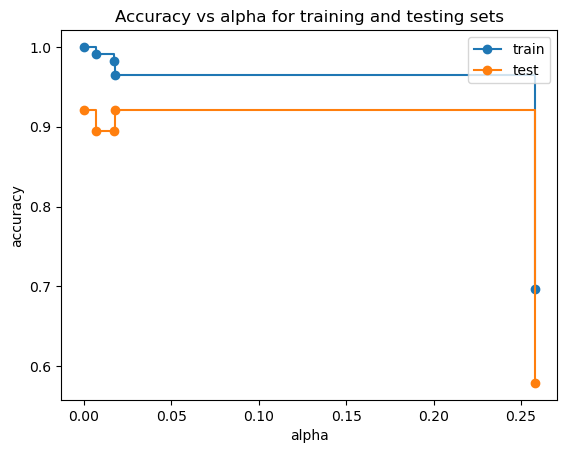

In [57]:
# Iris complexity pruning
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()





train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# for final plots
iris_depth = depth
iris_ccp_alphas = ccp_alphas
iris_train_scores = train_scores
iris_test_scores = test_scores

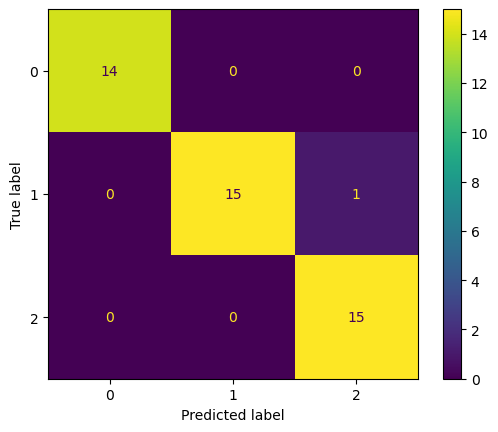

Iris training time:  0.010099172592163086
iris cv score:  0.96
iris tree depth:  3


[Text(0.375, 0.875, 'petal width (cm) <= -0.534\ngini = 0.666\nsamples = 105\nvalue = [36, 34, 35]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'petal width (cm) <= 0.559\ngini = 0.5\nsamples = 69\nvalue = [0, 34, 35]'),
 Text(0.25, 0.375, 'petal length (cm) <= 0.659\ngini = 0.108\nsamples = 35\nvalue = [0, 33, 2]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.375, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.75, 0.375, 'petal length (cm) <= 0.603\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

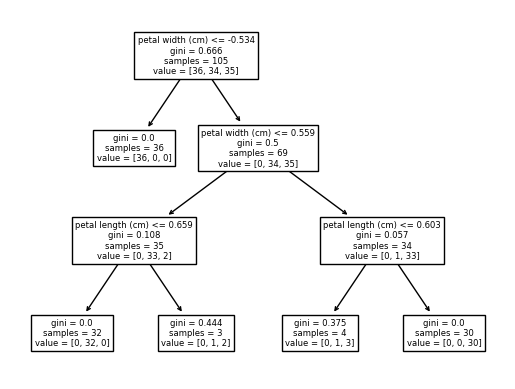

In [10]:
# Iris optimal params
best_train_size = .7
best_alpha = .02

iris = datasets.load_iris()
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = best_train_size)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = DecisionTreeClassifier(max_depth = 3, random_state=0)
start_timer = time()
for i in range(10):
    clf.fit(X_train,y_train)
bc_training_time = time() - start_timer

# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()

bc_final_score = cross_val_score(clf, X, y).mean()
bc_depth = clf.get_depth()

print("Iris training time: ", bc_training_time )
print("iris cv score: ", bc_final_score )
print("iris tree depth: ", bc_depth)

tree.plot_tree(clf, feature_names = iris.feature_names)

Breast Cancer default tree is depth  7
Breast Cancer default CV mean score with default params is  [1. 1. 1. 1. 1.]


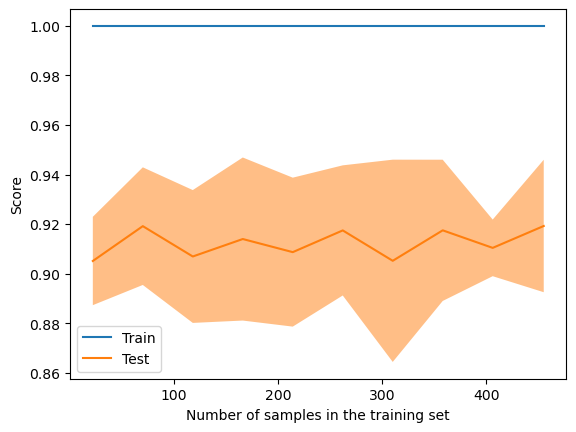

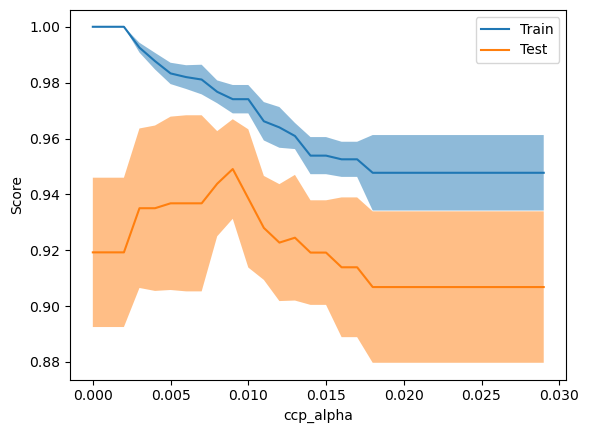

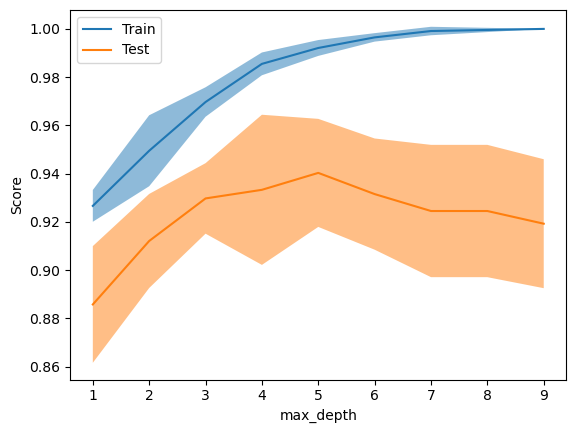

In [9]:
# Breast Cancer

# shuffled dataset
bc = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Default params score
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
bc_init_depth = clf.get_depth()
cv_results = cross_validate(clf, X, y, return_train_score = True)
train_scores = cv_results['train_score']
print("Breast Cancer default tree is depth ", bc_init_depth)
print("Breast Cancer default CV mean score with default params is ", train_scores)

# Learning Curve
LearningCurveDisplay.from_estimator(clf, X, y,train_sizes= np.linspace(0.05, 1.0, 10))

# Validation Curve for pre-pruning
ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "ccp_alpha", param_range = [x/1000 for x in range(0,30, 1)])

ValidationCurveDisplay.from_estimator(clf, X,y, param_name= "max_depth", 
                                      param_range = [x for x in range(1,10, 1)])

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


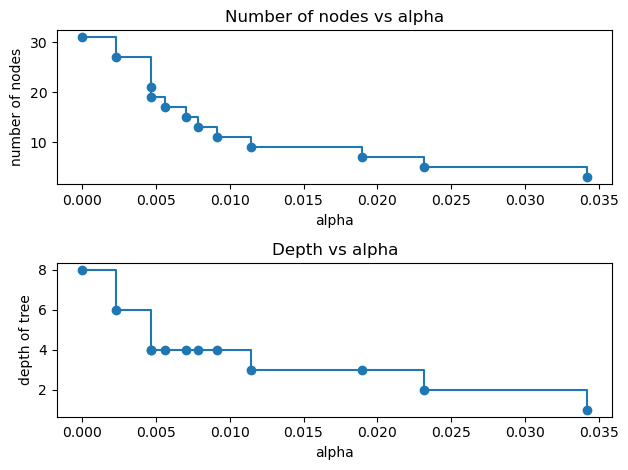

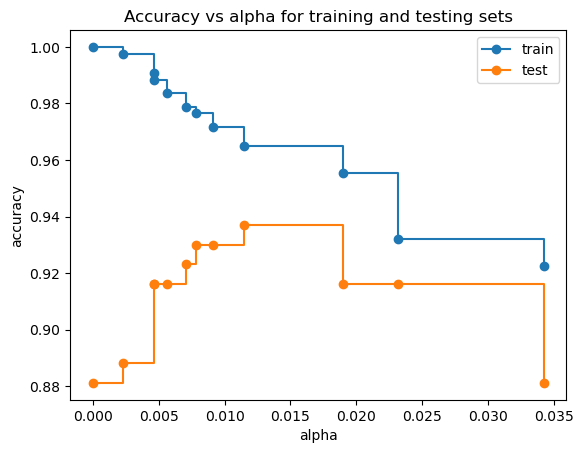

In [60]:
# Breast Cancer complexity pruning
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()


# for final plots
bc_depth = depth
bc_ccp_alphas =ccp_alphas

bc_train_scores = train_scores
bc_test_scores = test_scores

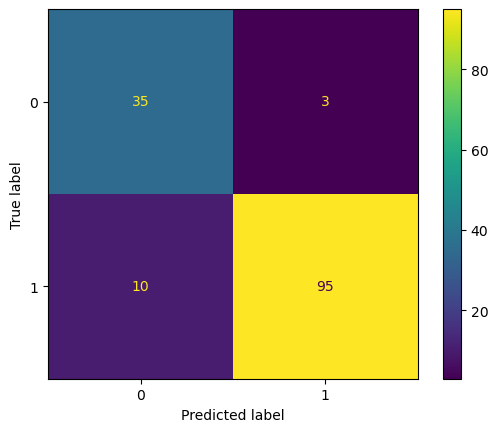

BC training time:  0.018997669219970703
BC cv score:  0.9490762303990063
BC tree depth:  4


[Text(0.5555555555555556, 0.9, 'worst concave points <= 0.142\ngini = 0.483\nsamples = 426\nvalue = [174, 252]'),
 Text(0.3333333333333333, 0.7, 'worst area <= 957.45\ngini = 0.169\nsamples = 269\nvalue = [25, 244]'),
 Text(0.2222222222222222, 0.5, 'mean texture <= 22.385\ngini = 0.083\nsamples = 254\nvalue = [11, 243]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.026\nsamples = 224\nvalue = [3, 221]'),
 Text(0.3333333333333333, 0.3, 'worst perimeter <= 101.3\ngini = 0.391\nsamples = 30\nvalue = [8, 22]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.165\nsamples = 22\nvalue = [2, 20]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.375\nsamples = 8\nvalue = [6, 2]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.7777777777777778, 0.7, 'mean concave points <= 0.05\ngini = 0.097\nsamples = 157\nvalue = [149, 8]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.8888888888888888, 0.5, 'gini = 0.039\nsamples = 151\nvalue =

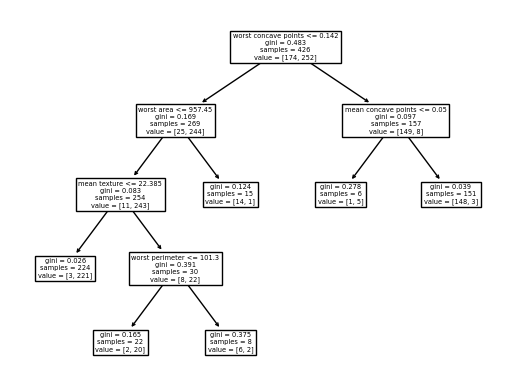

In [68]:
# final training with optimal param


bc = datasets.load_breast_cancer()
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = DecisionTreeClassifier(ccp_alpha = .009, random_state=0)
start_timer = time()
clf.fit(X_train,y_train)
bc_training_time = time() - start_timer

# Confusion Matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
cm_disp.plot()
plt.show()

bc_final_score = cross_val_score(clf, X, y).mean()
bc_depth = clf.get_depth()

print("BC training time: ", bc_training_time )
print("BC cv score: ", bc_final_score )
print("BC tree depth: ", bc_depth)

tree.plot_tree(clf, feature_names = bc.feature_names.tolist())

<Figure size 1000x600 with 0 Axes>

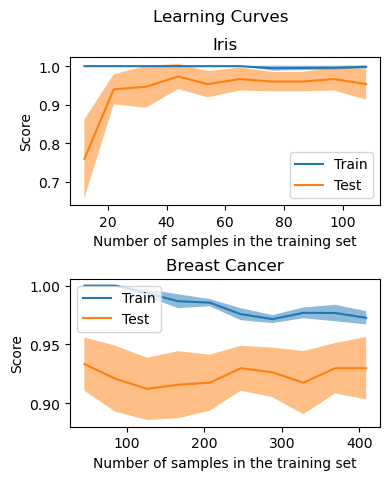

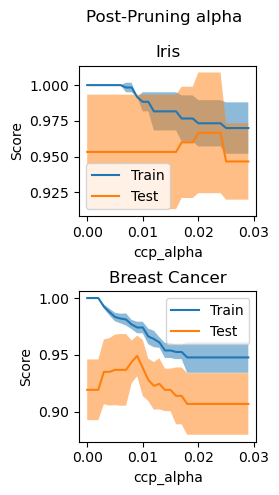

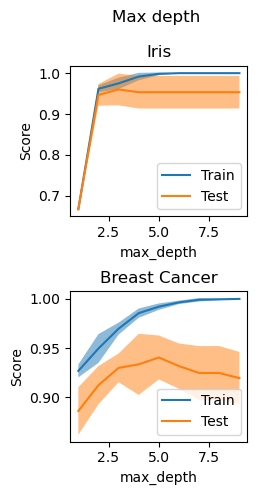

In [5]:
# Generate final plots

iris_x, iris_y = datasets.load_iris(return_X_y=True)
iris_x, iris_y = shuffle(iris_x, iris_y, random_state=0)

bc_x, bc_y = datasets.load_breast_cancer(return_X_y=True)
bc_x, bc_y = shuffle(bc_x, bc_y, random_state=0)

clf1 = DecisionTreeClassifier(ccp_alpha = 0.01, random_state=0)
clf2 = DecisionTreeClassifier(ccp_alpha = .009, random_state=0)


# learning curves
plt.figure(figsize=(10,6))
fig1, axs1 = plt.subplots(2)
fig1.set_figwidth(4)
fig1.suptitle("Learning Curves")
axs1[0].set_title("Iris")
axs1[1].set_title("Breast Cancer")
fig1.subplots_adjust(hspace = .5)
LearningCurveDisplay.from_estimator(clf1, iris_x, iris_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[0])
LearningCurveDisplay.from_estimator(clf2, 
                                    bc_x, bc_y, 
                                    train_sizes=np.linspace(0.1, .9, 10), ax = axs1[1])


# Validation curves
fig2, axs2 = plt.subplots(2)
fig2.suptitle("Post-Pruning alpha")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)
ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                      iris_x, iris_y, param_name= "ccp_alpha", 
                                      param_range = [x/1000 for x in range(0,30, 1)],
                                     ax = axs2[0])

ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                      bc_x, bc_y, param_name= "ccp_alpha", 
                                      param_range = [x/1000 for x in range(0,30, 1)],
                                      ax = axs2[1])

# pruning depth curves
fig3, axs3 = plt.subplots(2)
fig3.suptitle("Max depth")
axs3[0].set_title("Iris")
axs3[1].set_title("Breast Cancer")
fig3.tight_layout()
fig3.subplots_adjust(hspace = .5)
fig3.set_figwidth(2)
ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                       iris_x, iris_y, param_name= "max_depth", 
                                      param_range = [x for x in range(1,10, 1)],
                                     ax = axs3[0])
ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                      bc_x, bc_y, param_name= "max_depth", 
                                      param_range = [x for x in range(1,10, 1)],
                                     ax = axs3[1])

In [14]:
# final training with optimal param

# iris
X, y = datasets.load_iris(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = DecisionTreeClassifier(ccp_alpha = 0.02, random_state=0)
cv_results = cross_validate(clf, X, y)
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("training time:", fit_time)



CV test score: 0.9666666666666666
training time: 0.0010661602020263672


In [3]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X, y = shuffle(X, y, random_state=0) 
X_train, X_test, y_train, y_test = train_test_split(X,y)


clf = DecisionTreeClassifier(ccp_alpha =.009, random_state=0)
cv_results = cross_validate(clf, X, y)
f1_results = cross_validate(clf, X, y, scoring = 'f1')
f1_score = f1_results['test_score'].mean()
test_score = cv_results['test_score'].mean()
fit_time = cv_results['fit_time'].mean()

print("CV test score:", test_score)
print("f1 test score:", f1_score)
print("training time:", fit_time)

CV test score: 0.9490762303990063
f1 test score: 0.9593300184588918
training time: 0.036119842529296876


In [ ]:
# Validation curves
fig2, axs2 = plt.subplots(2)
fig2.suptitle("Post-Pruning alpha")
axs2[0].set_title("Iris")
axs2[1].set_title("Breast Cancer")
fig2.tight_layout()
fig2.set_figwidth(2)
fig2.subplots_adjust(hspace = .5)
ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                      iris_x, iris_y, param_name= "ccp_alpha", 
                                      param_range = [x/1000 for x in range(0,30, 1)],
                                     ax = axs2[0])

ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                      bc_x, bc_y, param_name= "ccp_alpha", 
                                      param_range = [x/1000 for x in range(0,30, 1)],
                                      ax = axs2[1])

# pruning depth curves
fig3, axs3 = plt.subplots(2)
fig3.suptitle("Max depth")
axs3[0].set_title("Iris")
axs3[1].set_title("Breast Cancer")
fig3.tight_layout()
fig3.subplots_adjust(hspace = .5)
fig3.set_figwidth(2)
ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                       iris_x, iris_y, param_name= "max_depth", 
                                      param_range = [x for x in range(1,10, 1)],
                                     ax = axs3[0])
ValidationCurveDisplay.from_estimator(DecisionTreeClassifier(random_state=0), 
                                      bc_x, bc_y, param_name= "max_depth", 
                                      param_range = [x for x in range(1,10, 1)],
                                     ax = axs3[1])